In [1]:
PATH ="../../data/"
filename = "data_homes.csv"

In [2]:
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import tree
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

import os
import pandas as pd

import statsmodels.api as sm
import itertools

In [3]:
full_filename = os.path.join(PATH, filename)

In [4]:
df = pd.read_csv(full_filename)

In [5]:
features = ['beds','bath', 'price', 'year_built', 'sqft', 'price_per_sqft', 'elevation']
labels = ['in_sf']

In [6]:
%%script echo No needed for Isolation Forest
X_train, X_test, Y_train, Y_test = train_test_split(df[features], df[labels], random_state=1984)

No needed for Isolation Forest


In [7]:
def compute_isolation_forest(df, features_selection):
    model = IsolationForest(
    n_estimators=20, 
    max_samples='auto', 
    contamination=float(0.1),
    max_features=len(features_selection))
    df_temp = df.copy()
    model.fit(df_temp[features_selection])
    df_temp['scores'] = model.decision_function(df_temp[features_selection])
#     df_temp['anomaly'] = model.predict(df_temp[features_selection])
    min_score = df_temp['scores'].min()
    min_features_selection = features_selection.copy()
    return min_score, min_features_selection
    
    
# function to tesfeatures_selectiont al features combinations
def fit_all_combinations(df, features):
    n_features = len(features)
    global_min_score = 1
    global_min_features_selection = None
    for it in range(1, n_features+1): 
        all_combinations = list(itertools.combinations(range(n_features), it))
        for comb in all_combinations:
            features_selection = []
            for idx in list(comb):
                features_selection.append(features[idx])
            print(features_selection)
            min_score, min_features_selection = compute_isolation_forest(df, features_selection)
            if min_score < global_min_score:
                global_min_score = min_score
                global_min_features_selection = features_selection.copy()
    return global_min_score, global_min_features_selection

global_min_score, global_min_features_selection = fit_all_combinations(df, features)

['beds']
['bath']
['price']
['year_built']
['sqft']


/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


['price_per_sqft']
['elevation']
['beds', 'bath']
['beds', 'price']
['beds', 'year_built']
['beds', 'sqft']


/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe

['beds', 'price_per_sqft']
['beds', 'elevation']
['bath', 'price']
['bath', 'year_built']
['bath', 'sqft']
['bath', 'price_per_sqft']


/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe

['bath', 'elevation']
['price', 'year_built']
['price', 'sqft']
['price', 'price_per_sqft']
['price', 'elevation']
['year_built', 'sqft']


/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe

['year_built', 'price_per_sqft']
['year_built', 'elevation']
['sqft', 'price_per_sqft']
['sqft', 'elevation']
['price_per_sqft', 'elevation']
['beds', 'bath', 'price']


/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe

['beds', 'bath', 'year_built']
['beds', 'bath', 'sqft']
['beds', 'bath', 'price_per_sqft']
['beds', 'bath', 'elevation']
['beds', 'price', 'year_built']
['beds', 'price', 'sqft']


/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


['beds', 'price', 'price_per_sqft']
['beds', 'price', 'elevation']
['beds', 'year_built', 'sqft']
['beds', 'year_built', 'price_per_sqft']
['beds', 'year_built', 'elevation']
['beds', 'sqft', 'price_per_sqft']


/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe

['beds', 'sqft', 'elevation']
['beds', 'price_per_sqft', 'elevation']
['bath', 'price', 'year_built']
['bath', 'price', 'sqft']
['bath', 'price', 'price_per_sqft']
['bath', 'price', 'elevation']


/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe

['bath', 'year_built', 'sqft']
['bath', 'year_built', 'price_per_sqft']
['bath', 'year_built', 'elevation']
['bath', 'sqft', 'price_per_sqft']
['bath', 'sqft', 'elevation']
['bath', 'price_per_sqft', 'elevation']


/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe

['price', 'year_built', 'sqft']
['price', 'year_built', 'price_per_sqft']
['price', 'year_built', 'elevation']
['price', 'sqft', 'price_per_sqft']
['price', 'sqft', 'elevation']


/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


['price', 'price_per_sqft', 'elevation']
['year_built', 'sqft', 'price_per_sqft']
['year_built', 'sqft', 'elevation']
['year_built', 'price_per_sqft', 'elevation']
['sqft', 'price_per_sqft', 'elevation']


/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


['beds', 'bath', 'price', 'year_built']
['beds', 'bath', 'price', 'sqft']
['beds', 'bath', 'price', 'price_per_sqft']
['beds', 'bath', 'price', 'elevation']
['beds', 'bath', 'year_built', 'sqft']
['beds', 'bath', 'year_built', 'price_per_sqft']


/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe

['beds', 'bath', 'year_built', 'elevation']
['beds', 'bath', 'sqft', 'price_per_sqft']
['beds', 'bath', 'sqft', 'elevation']
['beds', 'bath', 'price_per_sqft', 'elevation']
['beds', 'price', 'year_built', 'sqft']
['beds', 'price', 'year_built', 'price_per_sqft']


/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe

['beds', 'price', 'year_built', 'elevation']
['beds', 'price', 'sqft', 'price_per_sqft']
['beds', 'price', 'sqft', 'elevation']
['beds', 'price', 'price_per_sqft', 'elevation']
['beds', 'year_built', 'sqft', 'price_per_sqft']
['beds', 'year_built', 'sqft', 'elevation']


/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe

['beds', 'year_built', 'price_per_sqft', 'elevation']
['beds', 'sqft', 'price_per_sqft', 'elevation']
['bath', 'price', 'year_built', 'sqft']
['bath', 'price', 'year_built', 'price_per_sqft']
['bath', 'price', 'year_built', 'elevation']
['bath', 'price', 'sqft', 'price_per_sqft']


/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe

['bath', 'price', 'sqft', 'elevation']
['bath', 'price', 'price_per_sqft', 'elevation']
['bath', 'year_built', 'sqft', 'price_per_sqft']
['bath', 'year_built', 'sqft', 'elevation']
['bath', 'year_built', 'price_per_sqft', 'elevation']
['bath', 'sqft', 'price_per_sqft', 'elevation']


/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe

['price', 'year_built', 'sqft', 'price_per_sqft']
['price', 'year_built', 'sqft', 'elevation']
['price', 'year_built', 'price_per_sqft', 'elevation']
['price', 'sqft', 'price_per_sqft', 'elevation']
['year_built', 'sqft', 'price_per_sqft', 'elevation']
['beds', 'bath', 'price', 'year_built', 'sqft']


/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


['beds', 'bath', 'price', 'year_built', 'price_per_sqft']
['beds', 'bath', 'price', 'year_built', 'elevation']
['beds', 'bath', 'price', 'sqft', 'price_per_sqft']
['beds', 'bath', 'price', 'sqft', 'elevation']
['beds', 'bath', 'price', 'price_per_sqft', 'elevation']
['beds', 'bath', 'year_built', 'sqft', 'price_per_sqft']


/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe

['beds', 'bath', 'year_built', 'sqft', 'elevation']
['beds', 'bath', 'year_built', 'price_per_sqft', 'elevation']
['beds', 'bath', 'sqft', 'price_per_sqft', 'elevation']
['beds', 'price', 'year_built', 'sqft', 'price_per_sqft']
['beds', 'price', 'year_built', 'sqft', 'elevation']


/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


['beds', 'price', 'year_built', 'price_per_sqft', 'elevation']
['beds', 'price', 'sqft', 'price_per_sqft', 'elevation']
['beds', 'year_built', 'sqft', 'price_per_sqft', 'elevation']
['bath', 'price', 'year_built', 'sqft', 'price_per_sqft']
['bath', 'price', 'year_built', 'sqft', 'elevation']


/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe

['bath', 'price', 'year_built', 'price_per_sqft', 'elevation']
['bath', 'price', 'sqft', 'price_per_sqft', 'elevation']
['bath', 'year_built', 'sqft', 'price_per_sqft', 'elevation']
['price', 'year_built', 'sqft', 'price_per_sqft', 'elevation']
['beds', 'bath', 'price', 'year_built', 'sqft', 'price_per_sqft']
['beds', 'bath', 'price', 'year_built', 'sqft', 'elevation']


/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe

['beds', 'bath', 'price', 'year_built', 'price_per_sqft', 'elevation']
['beds', 'bath', 'price', 'sqft', 'price_per_sqft', 'elevation']
['beds', 'bath', 'year_built', 'sqft', 'price_per_sqft', 'elevation']
['beds', 'price', 'year_built', 'sqft', 'price_per_sqft', 'elevation']
['bath', 'price', 'year_built', 'sqft', 'price_per_sqft', 'elevation']
['beds', 'bath', 'price', 'year_built', 'sqft', 'price_per_sqft', 'elevation']


/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [8]:
print(global_min_score, global_min_features_selection )

-0.3509647124299111 ['price', 'sqft']


In [16]:
model = IsolationForest(
    n_estimators=20, 
    max_samples='auto', 
    contamination=float(0.1),
    max_features=len(global_min_features_selection)
)
model.fit(df[global_min_features_selection])
df['scores'] = model.decision_function(df[global_min_features_selection])
df['anomaly'] = model.predict(df[global_min_features_selection])

/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [18]:
model.estimators_[0]

ExtraTreeRegressor(max_depth=8, max_features=1, random_state=1311490029)

In [19]:
df.sort_values(by='scores', ascending=True).head(10)

,in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation,scores,anomaly
109,0,5.0,5.0,27500000,1930,7500,3667,21,-0.292914,-1
365,1,6.0,6.0,6895000,1902,7800,884,67,-0.221174,-1
139,0,7.0,7.0,19500000,1994,4238,4601,10,-0.196223,-1
120,0,5.0,5.0,19000000,2016,4972,3821,10,-0.188901,-1
137,0,5.0,5.0,19000000,2016,4972,3821,15,-0.188901,-1
22,0,4.0,5.0,13750000,2016,3699,3717,10,-0.184060,-1
108,0,4.0,5.0,17750000,2012,4476,3966,20,-0.184060,-1
117,0,3.0,3.0,14950000,1931,4435,3371,10,-0.179253,-1
123,0,10.0,10.0,7995000,1910,6400,1249,12,-0.171327,-1
402,1,4.0,3.5,9895000,2008,6024,1643,62,-0.161915,-1


In [20]:
print("Percentage of anomalies: {0}".format(round(df[df['anomaly']==-1].shape[0]/df.shape[0],2)))

Percentage of anomalies: 0.1


In [21]:
df.shape

(492, 10)

In [22]:
model.estimators_

[ExtraTreeRegressor(max_depth=8, max_features=1, random_state=1311490029),
 ExtraTreeRegressor(max_depth=8, max_features=1, random_state=1264012337),
 ExtraTreeRegressor(max_depth=8, max_features=1, random_state=1262363848),
 ExtraTreeRegressor(max_depth=8, max_features=1, random_state=739735917),
 ExtraTreeRegressor(max_depth=8, max_features=1, random_state=1337813180),
 ExtraTreeRegressor(max_depth=8, max_features=1, random_state=1180569234),
 ExtraTreeRegressor(max_depth=8, max_features=1, random_state=1723571734),
 ExtraTreeRegressor(max_depth=8, max_features=1, random_state=986259029),
 ExtraTreeRegressor(max_depth=8, max_features=1, random_state=1281005750),
 ExtraTreeRegressor(max_depth=8, max_features=1, random_state=1197871282),
 ExtraTreeRegressor(max_depth=8, max_features=1, random_state=1564552145),
 ExtraTreeRegressor(max_depth=8, max_features=1, random_state=2068733920),
 ExtraTreeRegressor(max_depth=8, max_features=1, random_state=1728501464),
 ExtraTreeRegressor(max_dep

In [23]:
outliers_counter = df[df['price'] > 6000000].shape[0]
outliers_counter

28

In [24]:
filtered = df[df['anomaly']==-1]
anomalies_outliter_counter = filtered[filtered['price'] > 6000000].shape[0]
anomalies_outliter_counter

28

In [25]:
print("Percentage of anomalies being outliers respect price {0}%".format(round(anomalies_outliter_counter/outliers_counter*100,2)))

Percentage of anomalies being outliers respect price 100.0%


In [26]:
fn=list(df[features].columns)
cn='anomaly'

[Text(0.48588709677419356, 0.9444444444444444, 'bath <= 2517.67\nsquared_error = 0.076\nsamples = 256\nvalue = 0.49'),
 Text(0.1586021505376344, 0.8333333333333334, 'bath <= 399.908\nsquared_error = 0.076\nsamples = 227\nvalue = 0.486'),
 Text(0.07258064516129033, 0.7222222222222222, 'beds <= 372472.793\nsquared_error = 0.004\nsamples = 2\nvalue = 0.318'),
 Text(0.06182795698924731, 0.6111111111111112, 'squared_error = 0.0\nsamples = 1\nvalue = 0.257'),
 Text(0.08333333333333333, 0.6111111111111112, 'squared_error = 0.0\nsamples = 1\nvalue = 0.379'),
 Text(0.2446236559139785, 0.7222222222222222, 'bath <= 793.832\nsquared_error = 0.077\nsamples = 225\nvalue = 0.487'),
 Text(0.10483870967741936, 0.6111111111111112, 'beds <= 967169.155\nsquared_error = 0.078\nsamples = 47\nvalue = 0.543'),
 Text(0.053763440860215055, 0.5, 'bath <= 608.856\nsquared_error = 0.081\nsamples = 37\nvalue = 0.52'),
 Text(0.021505376344086023, 0.3888888888888889, 'bath <= 444.531\nsquared_error = 0.075\nsamples =

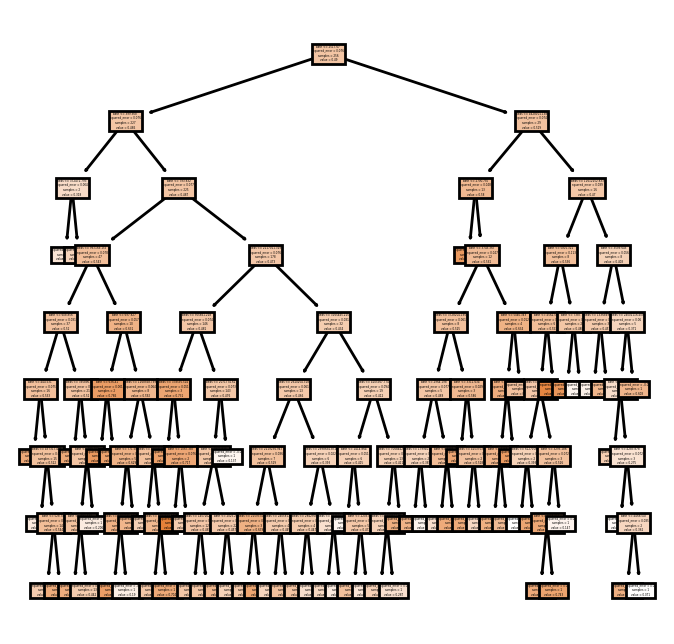

In [27]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=200)
tree.plot_tree(model.estimators_[0],
               feature_names = fn,
               class_names = 'anomaly',
               filled = True)

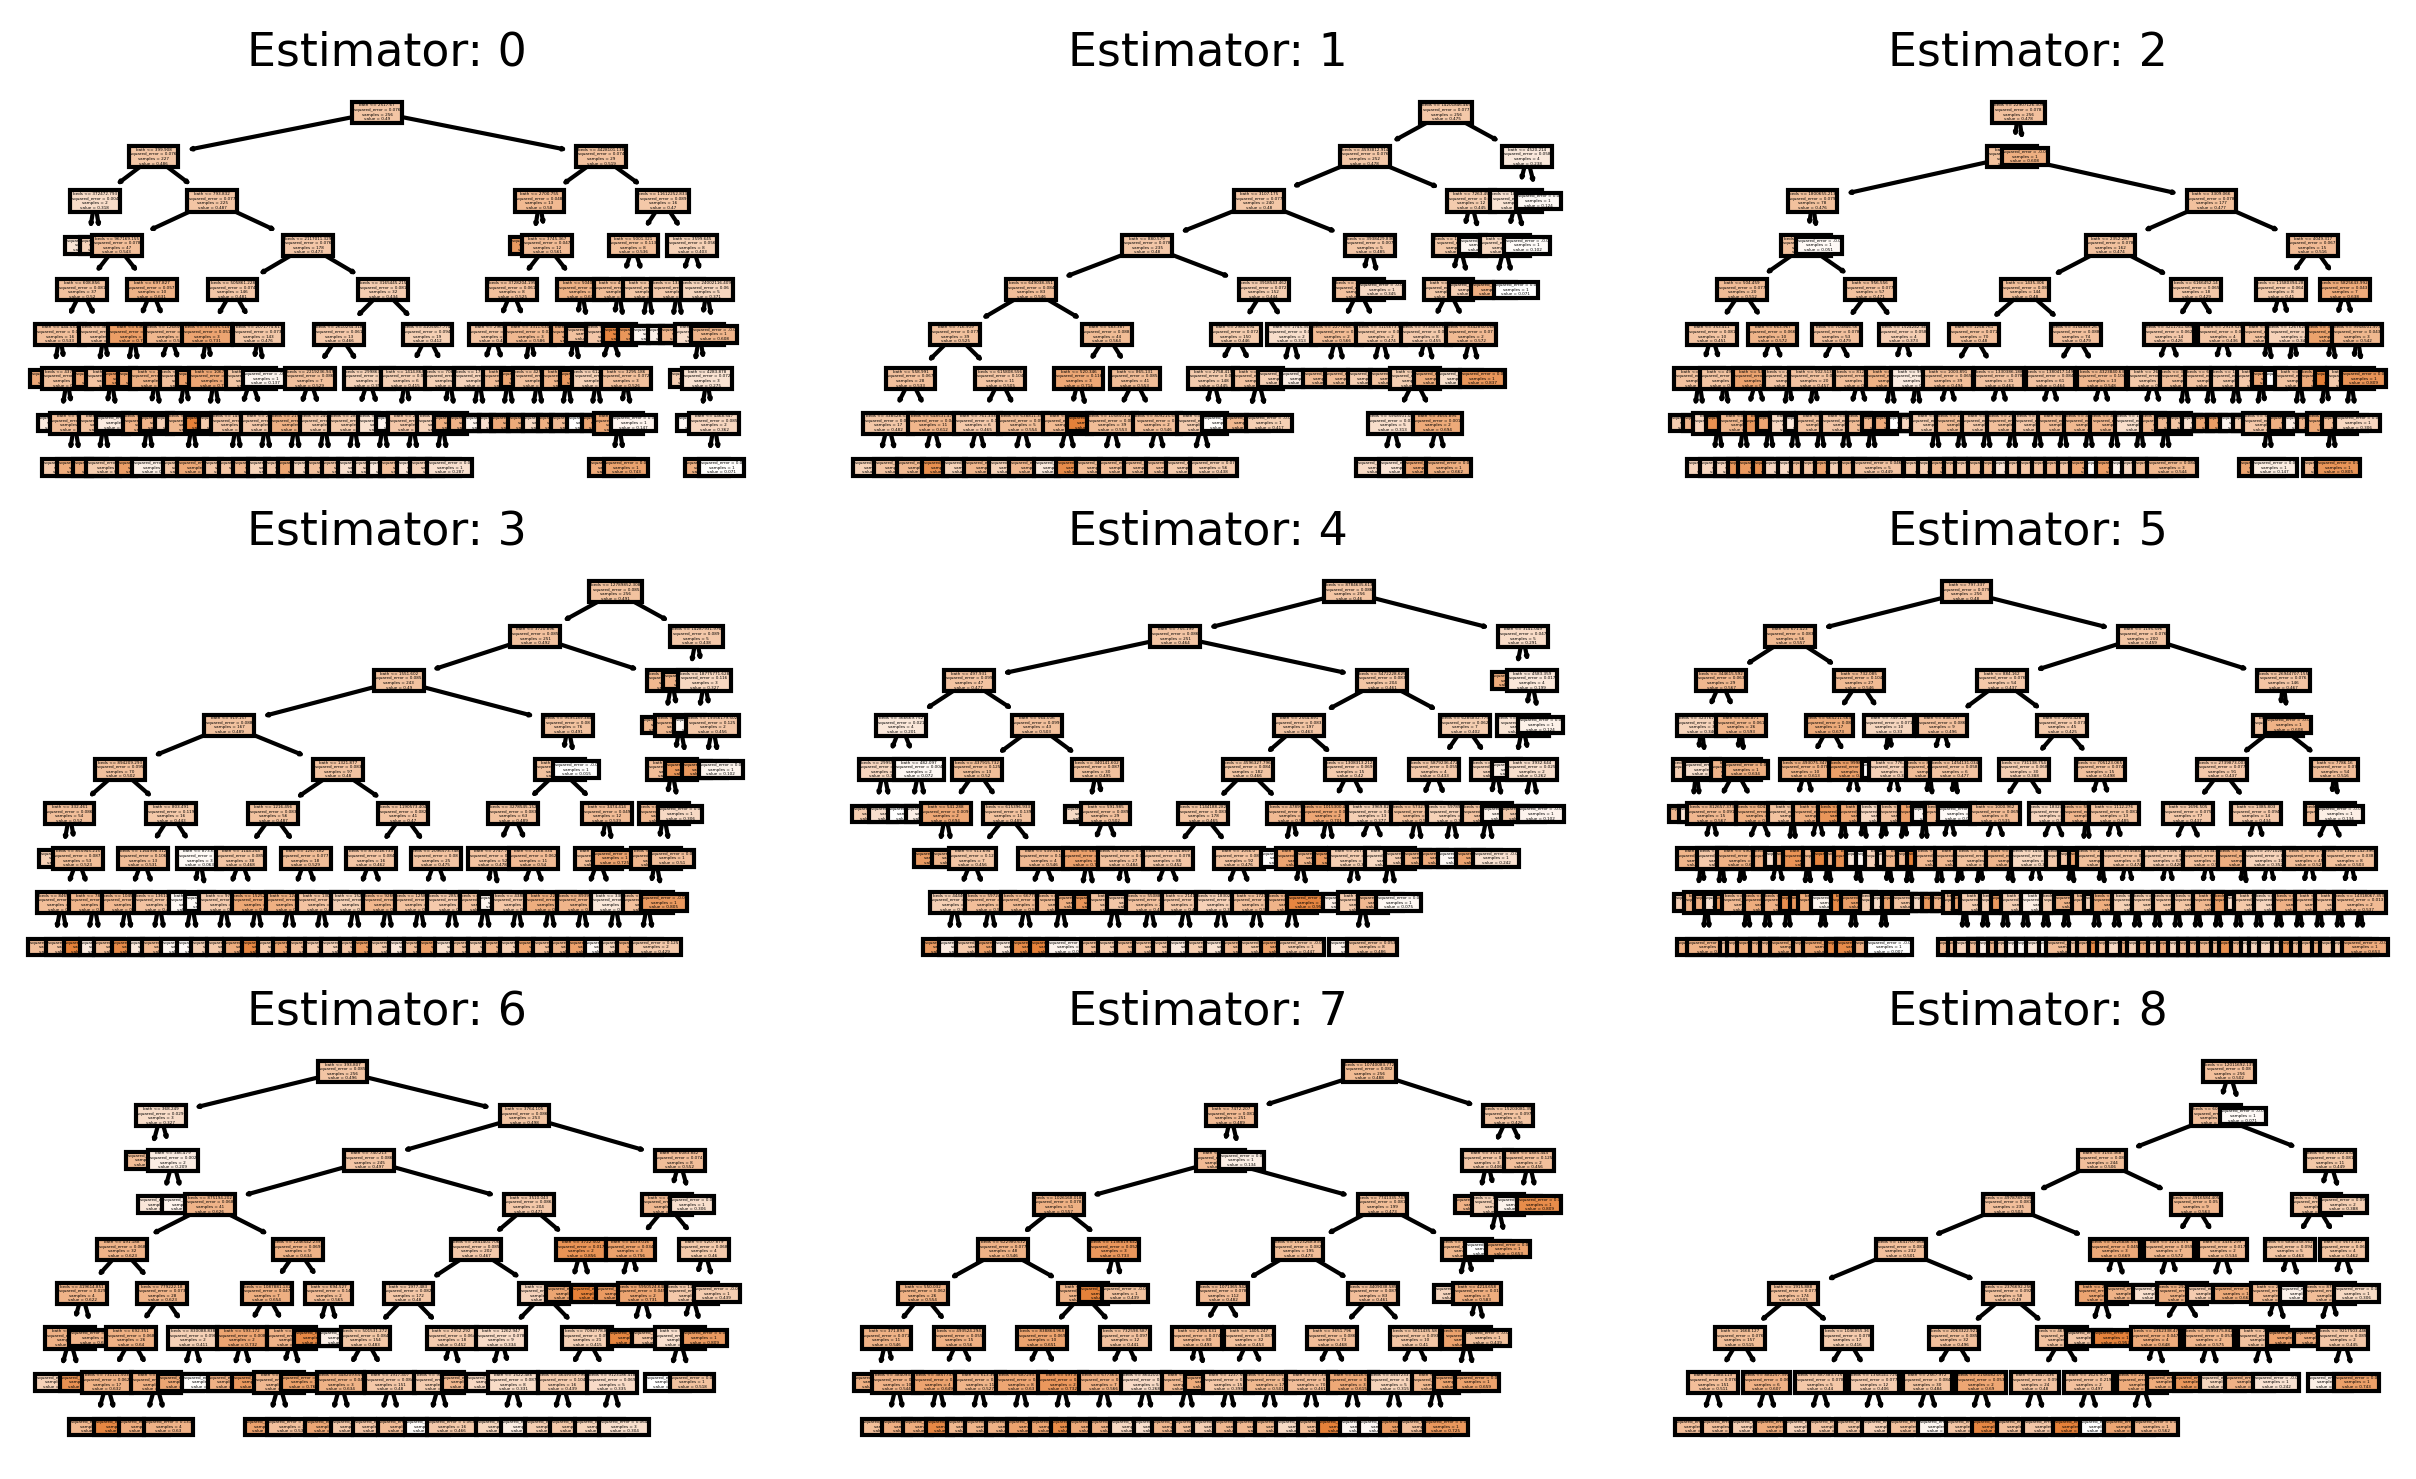

In [28]:
nrows = 3
ncols = 3
fig, axes = plt.subplots(nrows = nrows,ncols = ncols,figsize = (10,6), dpi=300)
for index in range(0, 9):
    row = index//ncols
    col = index%ncols
    tree.plot_tree(model.estimators_[index],
                   feature_names = fn, 
                   class_names='anomaly',
                   filled = True,
                   ax = axes[row, col]
                  )
    axes[row, col].set_title('Estimator: ' + str(index), fontsize = 11)

In [29]:
from dtreeviz.trees import dtreeviz

In [32]:

viz = dtreeviz(model.estimators_[0],
               df[global_min_features_selection], 
               df['anomaly'], 
               target_name='anomaly', 
               orientation ='LR',  # left-right orientation
               feature_names=features,
               class_names = ['inlier','anomaly'],
               X=df[features].iloc[0],
               fancy=False
              )  # need to give single observation for prediction
              
viz.view()  

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


In [53]:
%%script echo skip
from dtreeviz import clfviz

clfviz(
    model.estimators_[0],
    df[features],
    df['anomaly'],
    feature_names=features,
    target_name='anomaly'
)

skip


In [54]:
%%script echo skip
fig,axes = plt.subplots(1,2, figsize=(8,3.8), dpi=300)
clfviz(
    model.estimators_[0], 
    df[features], 
    df['anomaly'], 
    ax=axes[0],
    feature_names=['price', 'elevation']
)
clfviz(
    model.estimators_[0], 
    df[features], 
    df['anomaly'], 
    ax=axes[1],
    # show classification regions not probabilities
    show=['instances', 'boundaries', 'misclassified'], 
    feature_names=['price', 'elevation']
)
plt.show()

skip
